# PyCity Schools Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

In [2]:
# File to load
schools_complete = Path("./Resources/schools_complete.csv")
students_complete = Path("./Resources/students_complete.csv")

In [3]:
# Read School and Student Data File and store into Pandas DataFrames
schools_complete_df = pd.read_csv(schools_complete)
display(schools_complete_df.head())

students_complete_df = pd.read_csv(students_complete)
display(students_complete_df.head())

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [4]:
# Combine the data into a single dataset
school_data_complete = pd.merge(schools_complete_df, students_complete_df, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84


In [5]:
# Combine the data into a single dataset. NOTE: The common value "school_name" is only declared once, until the prior code.
school_data_complete = pd.merge(schools_complete_df, students_complete_df, how="left", on=["school_name"])
school_data_complete.head()

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84


## District Summary

In [6]:
# Calculate the total number of unique schools
school_count = school_data_complete["school_name"].nunique()
school_count

15

In [7]:
# Calculate the total number of students
student_count = school_data_complete["Student ID"].nunique()
student_count

39170

In [8]:
# Calculate the total budget
total_budget = school_data_complete.groupby("school_name")["budget"].first().sum()
total_budget

24649428

In [9]:
# Calculate the avarage (mean) math score
average_math_score = school_data_complete["math_score"].mean()
average_math_score

78.98537145774827

In [10]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()
average_reading_score

81.87784018381414

In [11]:
# Use the following to calculate the percentage of students who passed math (math scores greater than or equal to 70)
passing_math_count = school_data_complete[school_data_complete["math_score"] >= 70].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [12]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated).
passing_reading_count = school_data_complete[school_data_complete["reading_score"] >= 70].count()["student_name"]
passing_reading_percentage = passing_reading_count/float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [13]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70) & (students_complete_df["math_score"] >= 70)].count()["student_name"]
passing_math_reading_percentage = passing_math_reading_count / float(student_count) * 100
passing_math_reading_percentage

65.17232575950983

In [14]:
# Use the following to calculate the percentage of students that passed math and reading
# Note:  I use `school_data_complete`
passing_math_reading_count = school_data_complete[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)].count()["student_name"]
overall_passing_rate = passing_math_reading_count / float(student_count) * 100
overall_passing_rate

65.17232575950983

In [15]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({
    "Total Schools": [school_count],
    "Total Students": [student_count],
    "Total Budget": [total_budget], 
    "Average Math Score": [average_math_score], 
    "Average Reading Score": [average_reading_score],
    "% Passing Math": [passing_math_percentage], 
    "% Passing Reading": [passing_reading_percentage], 
    "% Overall Passing": [passing_math_reading_percentage]
})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


In [16]:
# Check the Dtype of each dimension
district_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total Schools          1 non-null      int64  
 1   Total Students         1 non-null      object 
 2   Total Budget           1 non-null      object 
 3   Average Math Score     1 non-null      float64
 4   Average Reading Score  1 non-null      float64
 5   % Passing Math         1 non-null      float64
 6   % Passing Reading      1 non-null      float64
 7   % Overall Passing      1 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 196.0+ bytes


## School Summary

In [17]:
# Use the code provided to select the type per school from school_data
school_types = school_data_complete["type"].unique()
school_types

array(['District', 'Charter'], dtype=object)

In [18]:
# Calculate the total student count per school from school_data
# Note: using .count() function
per_school_counts = school_data_complete.groupby("school_name")["school_name"].count()
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: school_name, dtype: int64

In [19]:
# This is another method to calculate the total student count using .size() function
per_school_counts = school_data_complete.groupby("school_name").size()
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
dtype: int64

In [20]:
# Calculate the total count by school `type`
per_type_counts = school_data_complete.groupby("type")["type"].count()
per_type_counts

type
Charter     12194
District    26976
Name: type, dtype: int64

In [21]:
# Identify the school type
school_type = school_data_complete.groupby("school_name")["type"].first()
school_type

school_name
Bailey High School       District
Cabrera High School       Charter
Figueroa High School     District
Ford High School         District
Griffin High School       Charter
Hernandez High School    District
Holden High School        Charter
Huang High School        District
Johnson High School      District
Pena High School          Charter
Rodriguez High School    District
Shelton High School       Charter
Thomas High School        Charter
Wilson High School        Charter
Wright High School        Charter
Name: type, dtype: object

In [22]:
# Calculate the total school budget and per capita spending per school from school_data
per_school_budget = school_data_complete.groupby("school_name")["budget"].first()
per_school_capita = per_school_budget / per_school_counts

budget_capita = pd.DataFrame({
    "Per School Budget": per_school_budget,
    "Per School Capita": per_school_capita    
})
budget_capita

,Per School Budget,Per School Capita
school_name,,
Bailey High School,3124928,628.0
Cabrera High School,1081356,582.0
Figueroa High School,1884411,639.0
Ford High School,1763916,644.0
Griffin High School,917500,625.0
Hernandez High School,3022020,652.0
Holden High School,248087,581.0
Huang High School,1910635,655.0
Johnson High School,3094650,650.0


In [23]:
# Calculate the average test scores per school from school_data_complete
per_school_math = school_data_complete.groupby("school_name")["math_score"].mean()
# display(per_school_math)
per_school_reading = school_data_complete.groupby("school_name")["reading_score"].mean()
# display(per_school_reading)

In [24]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_passing_math = school_data_complete[school_data_complete["math_score"] >= 70]
# students_passing_math
school_students_passing_math = students_passing_math.groupby("school_name")["Student ID"].count()
school_students_passing_math


school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: Student ID, dtype: int64

In [25]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
students_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70]
# students_passing_reading
school_students_passing_reading = students_passing_reading.groupby("school_name")["Student ID"].count()
display(school_students_passing_reading)


school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: Student ID, dtype: int64

In [26]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)]
# students_passing_math_and_reading
schools_students_passing_math_and_reading = students_passing_math_and_reading.groupby("school_name")["Student ID"].size()
schools_students_passing_math_and_reading



school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
Name: Student ID, dtype: int64

In [27]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100     # per_school_counts = school_data_complete.groupby("school_name").size()
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_school_passing_rate = schools_students_passing_math_and_reading / per_school_counts * 100
overall_school_passing_rate

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [28]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame({
    "School Type": school_type,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget, 
    "Per Student Budget": per_school_capita, 
    "Average Math Score": per_school_math, 
    "Average Reading Score": per_school_reading, 
    "% Passing Math": per_school_passing_math,
    "% Passing Reading": per_school_passing_reading,
    "% Overall Passing": overall_school_passing_rate
})
per_school_summary.index.name = None

# Formatting
# per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
# per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)
# per_school_summary["Average Math Score"] = per_school_summary["Average Math Score"].map("{:,.2f}".format)
# per_school_summary["Average Reading Score"] = per_school_summary["Average Reading Score"].map("{:,.2f}".format)
# per_school_summary["% Passing Math"] = per_school_summary["% Passing Math"].map("{:,.2f}%".format)
# per_school_summary["% Passing Reading"] = per_school_summary["% Passing Reading"].map("{:,.2f}%".format)
# per_school_summary["% Overall Passing"] = per_school_summary["% Overall Passing"].map("{:,.2f}%".format)

per_school_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


## Highest-Performing Schools (by % Overall Passing)

In [29]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
# SYNTAX: df.sort_values(by='col_name', ascending=False)
top_schools = per_school_summary.sort_values(by='% Overall Passing', ascending=False)   #`by="% Overall Passing"` == `["% Overall Passing"]
top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [30]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
# SYNTAX: df.sort_values(by='col_name', ascending=True)
bottom_schools = per_school_summary.sort_values(by="% Overall Passing", ascending=True)
bottom_schools.head()


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [31]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grader_math_scores = ninth_graders.groupby("school_name")["math_score"].mean()
tenth_grader_math_scores = tenth_graders.groupby("school_name")["math_score"].mean()
eleventh_grader_math_scores = eleventh_graders.groupby("school_name")["math_score"].mean()
twelfth_grader_math_scores = twelfth_graders.groupby("school_name")["math_score"].mean()

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({
    "9th": ninth_grader_math_scores,
    "10th": tenth_grader_math_scores,
    "11th": eleventh_grader_math_scores,
    "12th": twelfth_grader_math_scores    
})

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade


,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [32]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby("school_name")["reading_score"].mean()
tenth_grader_reading_scores = tenth_graders.groupby("school_name")["reading_score"].mean()
eleventh_grader_reading_scores = eleventh_graders.groupby("school_name")["reading_score"].mean()
twelfth_grader_reading_scores = twelfth_graders.groupby("school_name")["reading_score"].mean()

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grader_reading_scores,
    "11th": eleventh_grader_reading_scores,
    "12th": twelfth_grader_reading_scores    
})

# Minor data wrangling
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade


,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [33]:
# I've added this as extra. This will allow for visualization using a plot/graph
import matplotlib.pyplot as plt

In [34]:
# Establish the bins
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-$630", "$630-645", "$645-680"]

In [35]:
# Create a copy of the school summary since it has the "Per Student Budget"
school_spending_df = per_school_summary.copy()

In [36]:
# Use `pd.cut()` to categorize spending based on the bins
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"].replace('[>$,]', '', regex=True).astype(float),bins=spending_bins,labels=labels)
school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-$630
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-$630
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,90.540541,$585-$630


<Axes: ylabel='Spending Ranges (Per Student)'>

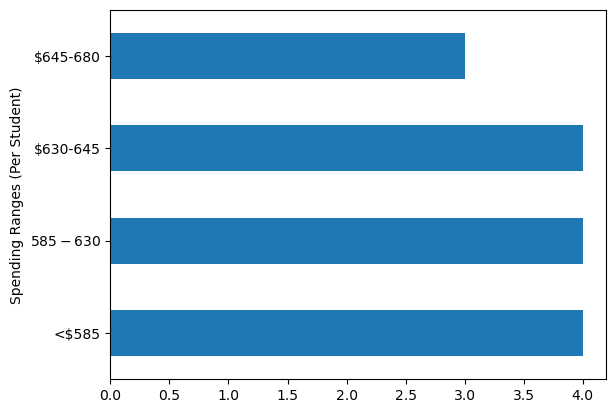

In [37]:
# This step is not included in the original assignment. This is only for my reference.
school_spending_df["Spending Ranges (Per Student)"].value_counts().plot(kind="barh")

In [38]:
school_spending_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Bailey High School to Wright High School
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   School Type                    15 non-null     object  
 1   Total Students                 15 non-null     int64   
 2   Total School Budget            15 non-null     int64   
 3   Per Student Budget             15 non-null     float64 
 4   Average Math Score             15 non-null     float64 
 5   Average Reading Score          15 non-null     float64 
 6   % Passing Math                 15 non-null     float64 
 7   % Passing Reading              15 non-null     float64 
 8   % Overall Passing              15 non-null     float64 
 9   Spending Ranges (Per Student)  15 non-null     category
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 1.9+ KB


In [39]:
#  Calculate averages for the desired columns.
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()


C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\3377404583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\3377404583.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\3377404583.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True

In [40]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending
})

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-$630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


In [41]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending
})

# Display results
spending_summary


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-$630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [42]:
# Create a copy per_school_summary
per_school_summary_df = per_school_summary.copy()

In [43]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]


In [44]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], bins=size_bins, labels=labels)
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [45]:
# Calculate averages for the desired columns.
size_math_scores = per_school_summary_df.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary_df.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary_df.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = per_school_summary_df.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = per_school_summary_df.groupby(["School Size"])["% Overall Passing"].mean()


C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\2673341830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_math_scores = per_school_summary_df.groupby(["School Size"])["Average Math Score"].mean()
C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\2673341830.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_reading_scores = per_school_summary_df.groupby(["School Size"])["Average Reading Score"].mean()
C:\Users\UCBDATA\AppData\Local\Temp\ipykernel_8232\2673341830.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

In [46]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores, 
    "Average Reading Score": size_reading_scores, 
    "% Passing Math": size_passing_math, 
    "% Passing Reading": size_passing_reading, 
    "% Overall Passing": size_overall_passing
})

# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [47]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()


In [48]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "% Passing Math": average_percent_passing_math_by_type,
    "% Passing Reading": average_percent_passing_reading_by_type,
    "% Overall Passing": average_percent_overall_passing_by_type
})

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


#### *** END OF CODE ***